In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Multiple Linear Regression using Gradient Descent

In [11]:
# download the dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape # 20640, 8
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Feature Normalization

1. Subtract the mean value of each feature from the dataset.
2. After subtracting the mean, additionally scale (divide) the feature values by their resp. standard deviations.


In [12]:
X = ( X - X.mean(axis=0)) / X.std(axis=0) # same as using (X - np.mean(X, axis=0))/np.std(X, axis=0)


In [13]:
# after feature norm
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785


# Create Train - Test split

In [14]:
# Concat X and y 
X = pd.concat([X, y], axis=1)

# get train and test sets
train_set = X.sample(frac=0.8, replace=False, random_state=42)

# Drop all indexes from the dataframe that exist in the training set
test_set = X.drop(train_set.index)

print(len(train_set), len(test_set))

16512 4128


In [15]:
X_train, y_train = train_set.iloc[:, :-1].to_numpy(), train_set.iloc[:, -1].to_numpy()
X_test, y_test = test_set.iloc[:, :-1].to_numpy(), test_set.iloc[:, -1].to_numpy()

# adding intercept term to X_train and X_test data in 0th column
# now, we will have 8 + 1 i.e (m+1) features
ones = np.ones((X_train.shape[0],1))
X_train = np.column_stack((ones, X_train)) # same as np.hstack((ones, X_train))

ones = np.ones((X_test.shape[0],1))
X_test = np.column_stack((ones, X_test)) # same as np.hstack((ones, X_train))

# adding 1 column to y_train and y_test data
y_train, y_test = y_train[:, np.newaxis], y_test[:, np.newaxis]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_test)

(16512, 9) (16512, 1) (4128, 9) (4128, 1)
[[ 1.         -0.09446729  1.85613656 ... -0.08649932  1.03379578
  -1.33778543]
 [ 1.         -0.31590912  1.85613656 ... -0.09836356  1.03847753
  -1.34277661]
 [ 1.         -0.63009649  1.85613656 ... -0.10474594  1.03379578
  -1.34277661]
 ...
 [ 1.         -0.39249525 -1.08374113 ... -0.03381215  1.6986046
  -0.93849053]
 [ 1.         -1.14256563 -0.92482882 ... -0.07173277  1.77819439
  -0.82369324]
 [ 1.         -0.78011057 -1.00428498 ... -0.0436811   1.75010387
  -0.83367562]]


# Calculate Closed form solution:
 Calculate R2 score to check whether Multi Linear Regression is a good model 
 or if non-linear relationships are present
 which can be better explained with a knn or trees model

In [38]:
# Closed form solution :
def closed_form_solution(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

w = closed_form_solution(X_train, y_train)
print("theta coefficients: \n", w)
# calculate r2 score on closed form solution
y_train_pred = X_train @ w
train_score = r2_score(y_train, y_train_pred)
mae_s = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
mse_s = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_s = np.sqrt(mse_s)
print(f'\nR2 score (train): {train_score:.4f}')
print("MAE (train): ", round(mae_s,2))
print("MSE (train): ", round(mse_s,2))
print("RMSE (train): ", round(rmse_s,2))


y_test_pred = X_test @ w

test_score = r2_score(y_test, y_test_pred)
mae_s = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
mse_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse_s = np.sqrt(mse_s)
print(f'\nR2 score (test): {test_score:.4f}')
print("MAE (test): ", round(mae_s,2))
print("MSE (test): ", round(mse_s,2))
print("RMSE (test): ", round(rmse_s,2))

"""
Thus, the Multi Linear Regression model cannot do very well on the dataset. The dataset probably contains
non-linear relationships that need to be explored by knn or random forests models.
"""

theta coefficients: 
 [[ 2.06700856]
 [ 0.84500546]
 [ 0.11831387]
 [-0.29812213]
 [ 0.31341651]
 [-0.00863317]
 [-0.04298979]
 [-0.88592418]
 [-0.85721543]]

R2 score (train): 0.6105
MAE (train):  0.53
MSE (train):  0.52
RMSE (train):  0.72

R2 score (test): 0.5875
MAE (test):  0.54
MSE (test):  0.56
RMSE (test):  0.75


'\nThus, the Multi Linear Regression model cannot do very well on the dataset. The dataset probably contains\nnon-linear relationships that need to be explored by knn or random forests models.\n'

# Create Multi Linear Regression Class

In [49]:
class MultiLinearRegression():
    def __init__(self, m_features, lr):
        self.theta = np.zeros(shape=(m_features, 1)) # theta0, theta1, ..., theta_m
        self.lr = lr
        return
    
    def forward(self, X):
        return np.dot(X, self.theta) # n x 1
    
    def backward(self, X, y, y_hat):
        n = y.shape[0]
        temp = 2*(y_hat - y)
        temp = np.dot(X.T, temp)
        d_theta = (1/n) * temp # (m+1) x 1
        self.theta -= self.lr * d_theta
        return
        
def avg_mse_loss(y, y_hat):
    n = y_hat.shape[0]
    e = y_hat - y
    return np.sum(np.power(e,2)) / (n)

# Import model and hyperparameters

In [50]:
epochs = 100
lr = 0.001
batch_size = 64
features = X_train.shape[1] # (m + 1)
x_train_batches = X_train.reshape(-1, batch_size, features)
y_train_batches = y_train.reshape(-1, batch_size, 1)

model = MultiLinearRegression(m_features=features, lr=lr)
print(model.theta.shape)

(9, 1)


# Training Pipeline

In [51]:
y_train_batches[0].shape, model.forward(x_train_batches[0]).shape, x_train_batches[0].shape

((64, 1), (64, 1), (64, 9))

In [52]:
train_loss = []
for epoch in range(epochs):
    batch_loss = 0.0
    for x_batch, y_batch in zip(x_train_batches, y_train_batches):
        # forward propagation
        y_hat = model.forward(X=x_batch) # nx1

        # calculate loss
        cf = avg_mse_loss(y=y_batch, y_hat=y_hat)
        batch_loss+=cf

        # backward propagation, calculate gradients, update weights
        model.backward(X=x_batch, y=y_batch, y_hat=y_hat)
    
    batch_loss = np.average(batch_loss)
    train_loss.append(batch_loss)

    if epoch%20==0:
        print(f'Batch RMSE Loss = {round(np.sqrt(batch_loss),2)} at epoch {epoch}/{epochs}')

Batch RMSE Loss = 31.05 at epoch 0/100
Batch RMSE Loss = 11.84 at epoch 20/100
Batch RMSE Loss = 11.62 at epoch 40/100
Batch RMSE Loss = 11.58 at epoch 60/100
Batch RMSE Loss = 11.57 at epoch 80/100


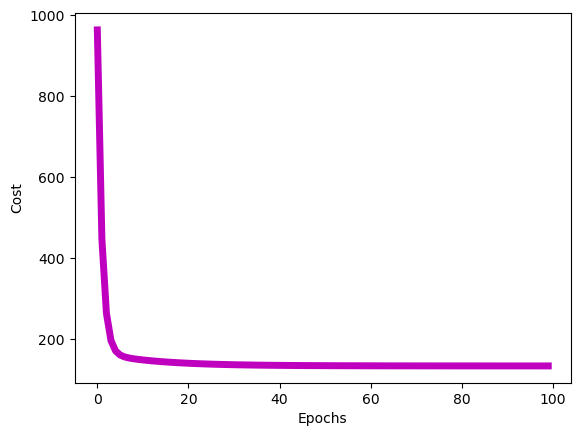

In [53]:
def plot_cost(loss, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, loss, 'm', linewidth = "5")
	plt.show()

plot_cost(train_loss, range(epochs))


# Predict on test data

In [54]:

def predict():
    # store best weights
    trained_theta = model.theta
    batch = X_test.shape[0]
    y_hat = np.dot(X_test, trained_theta)

    # rmse
    mse = avg_mse_loss(y=y_test, y_hat=y_hat)
    rmse = np.sqrt(mse)

    # mae
    e = np.abs(y_test-y_hat)
    mae = (1/(batch)) * np.sum(e)

    # r squared
    y_mean = np.mean(y_test)
    sst = np.sum((y_test-y_mean)**2)
    sse = np.sum((y_test-y_hat)**2)
    r2 = 1 - (sse/sst)
    
    return mae, mse, rmse, r2

In [55]:
mae, mse, rmse, r2 = predict()

y_hat = model.forward(X_test)
mae_s = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mse_s = mean_squared_error(y_true=y_test, y_pred=y_hat)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_true=y_test, y_pred=y_hat)

print("Eval metrics calculated through my predict() function vs sklearn :")
print("MAE sklearn: ", round(mae_s,2), " MAE predict(): ", round(mae, 2))
print("MSE sklearn: ", round(mse_s,2), " MSE predict(): ", round(mse,2))
print("RMSE sklearn: ", round(rmse_s,2), " RMSE predict(): ", round(rmse,2))
print("R2 sklearn: ", round(r2_s,2), " R2 predict(): ", round(r2,2))

Eval metrics calculated through my predict() function vs sklearn :
MAE sklearn:  0.54  MAE predict():  0.54
MSE sklearn:  0.56  MSE predict():  0.56
RMSE sklearn:  0.75  RMSE predict():  0.75
R2 sklearn:  0.59  R2 predict():  0.59
